In [1]:
import pandas as pd
import mio
import numpy as np
from matplotlib import pyplot as plt

In [2]:
tag = '1011'

In [3]:
# read building heights above sea level
sl_bui = (
    mio.read_raster(f'../25k_sl_bui/{tag}_sl_bui.bil')[0]
    .replace(0, np.nan)
)

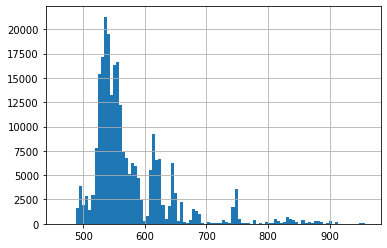

In [4]:
sl_bui.stack().hist(bins=100)

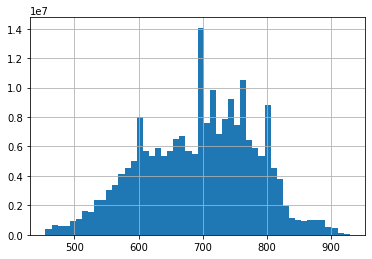

In [7]:
# read relief data
rel = mio.read_raster(f'../25k_rel/{tag}_rel.bil')[0]
rel.stack().hist(bins=50)

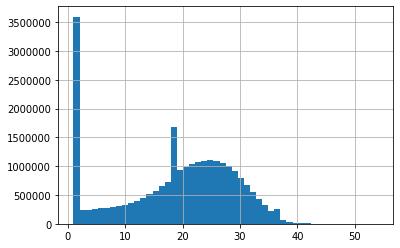

In [9]:
# read vegatation heights over ground
veg = mio.read_raster(f'../25k_veg/veg_{tag}.bil')[0]
veg[veg>0].stack().hist(bins=50)

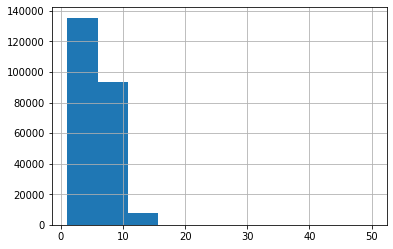

In [10]:
# calc builings over ground
bui = (sl_bui - rel).fillna(0)
bui[bui>0].stack().hist()

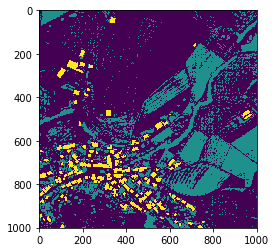

In [11]:
# create clutter classes 1 = vegetation, 2 = buildings
cla = np.maximum(2 * (bui>0).astype(int) , (veg>0).astype(int) )
plt.imshow(cla.loc[292_000:291_000, 682_000:683_000])

In [12]:
bui.stack().value_counts()[0:10]

0.0     209752750
5.0         34106
4.0         32594
6.0         32073
3.0         30855
7.0         24782
2.0         23197
8.0         18417
1.0         14776
9.0         11846
10.0         6347
dtype: int64

In [13]:
cla.stack().value_counts()

0    184882859
1     24880357
2       236784
dtype: int64

In [14]:
mio.write_raster(cla.astype('uint8'), f'../25k_cl_class/{tag}_cl_class.bil')

In [15]:
# create clutter heights layer
hei = np.maximum(bui , veg )

In [16]:
mio.write_raster(hei.astype('uint8'), f'../25k_cl_height/{tag}_cl_height.bil')